In [1]:
import pandas as pd
import numpy as np
from datetime import datetime 
from datetime import timedelta
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
users = pd.read_csv('takehome_users.csv',encoding='ISO-8859-1', index_col='object_id')
engagement = pd.read_csv('takehome_user_engagement.csv')

In [3]:
users.head()

,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
object_id,,,,,,,,,
1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [4]:
engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [5]:
users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 1 to 12000
Data columns (total 9 columns):
creation_time                 12000 non-null object
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
dtypes: float64(2), int64(3), object(4)
memory usage: 937.5+ KB


In [6]:
engagement['time_stamp'] = pd.to_datetime(engagement['time_stamp'])
users['creation_time'] = pd.to_datetime(users['creation_time'])

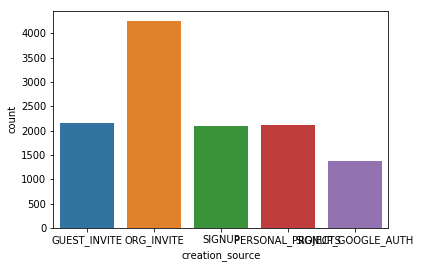

In [7]:
sns.countplot(users['creation_source'])
plt.rcParams['figure.figsize'] = (12.0, 8.0)
plt.show()

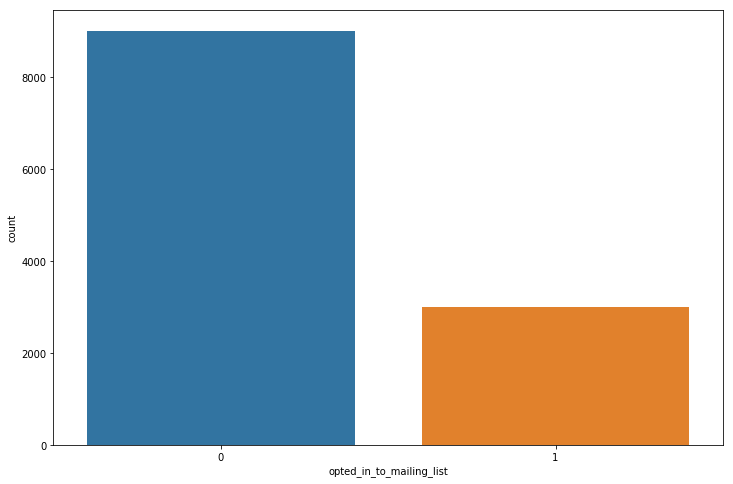

In [8]:
sns.countplot(users['opted_in_to_mailing_list'])
plt.rcParams['figure.figsize'] = (12.0, 8.0)
plt.show()

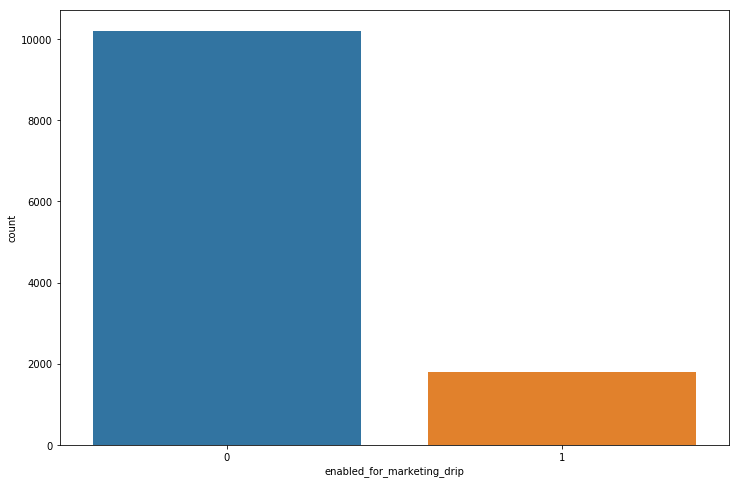

In [9]:
sns.countplot(users['enabled_for_marketing_drip'])
plt.rcParams['figure.figsize'] = (12.0, 8.0)
plt.show()

In [10]:
def adopted(x):
    """
    Takes property object x
    converts x to list
    returns 1 if a user logged into the product on three separate
    days in at least one seven day period 
    """
    if len(x) >= 3:  # condition to eliminate if user has less than 3 time stamps
        x = [i for i in x]  # convert property object to list
        x.sort()  # sort the dates in increasing order
        x = [x[i+1] - x[i] for i in range(len(x)-2)]  # compute cumulative difference of current and next day
        # sum i, i+1, i+2 terms and check if it`s less than 7 which gives if it`s in a seven day period
        x = [1 for i in range(len(x)-2) if x[i] + x[i+1] + x[i+2] <= timedelta(days=7)]
        # condition to check if there`s a 1 in x, return 1 if true
        if 1 in x:
            return 1

In [11]:
df1 = engagement.groupby('user_id').agg(adopted)  # group by user_id and aggregate using custom function
df1.fillna(0, inplace=True)  # fill null values with 0
df1.columns = ['adopted_user']
df1.head()

,adopted_user
user_id,
1,0.0
2,0.0
3,0.0
4,0.0
5,0.0


In [12]:
adt = np.unique(df1['adopted_user'],return_counts=True)
rate = adt[1][1]/len(users)
rate

0.11016666666666666

A little over 10% of users in the data set are adopted users. 

In [13]:
data = users.join(df1, how='left')
data.head()

,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
object_id,,,,,,,,,,
1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0.0
2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,0.0
3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0.0
4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0.0
5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0.0


In [14]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
invited_by_user_id,5583,0.46525
adopted_user,3177,0.26475
last_session_creation_time,3177,0.26475
org_id,0,0.00000
enabled_for_marketing_drip,0,0.00000
opted_in_to_mailing_list,0,0.00000
creation_source,0,0.00000
email,0,0.00000
name,0,0.00000
creation_time,0,0.00000


## Data Cleaning 

In [15]:
data['invited_by_user_id'].fillna(0, inplace=True)
data['adopted_user'].fillna(0,inplace=True)
data = data.dropna().reset_index(drop=True)

In [16]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
adopted_user,0,0.0
invited_by_user_id,0,0.0
org_id,0,0.0
enabled_for_marketing_drip,0,0.0
opted_in_to_mailing_list,0,0.0
last_session_creation_time,0,0.0
creation_source,0,0.0
email,0,0.0
name,0,0.0
creation_time,0,0.0


In [17]:
# Create new feature called usage the difference of creation_time and last_session_creation_time:
data['last_session_creation_time'] = data['last_session_creation_time'].apply(int)
data['last_session_creation_time'] = data['last_session_creation_time'].map(lambda x: datetime.fromtimestamp(x).strftime('%Y-%m-%d %H:%M:%S'))
data['last_session_creation_time'] = pd.to_datetime(data['last_session_creation_time'])
data['usage'] = data['last_session_creation_time'] - data['creation_time']

In [18]:
data = data[data['usage'] >= timedelta(days=0)]
data['usage'] = data['usage'].map(lambda x: x.total_seconds())
data = data.drop(['creation_time', 'last_session_creation_time'], axis=1)

I created a variable called usage. Looking at the problem in relationship to the data, the longer a person has been using relax inc the more likely they are to become an adopted user.

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5796 entries, 1 to 8821
Data columns (total 9 columns):
name                          5796 non-null object
email                         5796 non-null object
creation_source               5796 non-null object
opted_in_to_mailing_list      5796 non-null int64
enabled_for_marketing_drip    5796 non-null int64
org_id                        5796 non-null int64
invited_by_user_id            5796 non-null float64
adopted_user                  5796 non-null float64
usage                         5796 non-null float64
dtypes: float64(3), int64(3), object(3)
memory usage: 452.8+ KB


In [20]:
from sklearn.preprocessing import RobustScaler
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, confusion_matrix
from sklearn import decomposition

In [21]:
y = data['adopted_user']
x = data.drop(['adopted_user', 'name', 'email'], axis=1)

x = pd.get_dummies(x, drop_first=True)

In [24]:
# Use SVC classifier:
scaler = RobustScaler()

scaler.fit_transform(x)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=15)

model = LinearSVC()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# scores

print("{:30}{:3f}".format('F1 score', f1_score(y_test, y_pred)))
print("{:30}{:3f}".format('Test accuracy', accuracy_score(y_test, y_pred)))
print()

print('====Confusion Matrix=====')
print(confusion_matrix(y_test, y_pred))

F1 score                      0.000000
Test accuracy                 0.755172

====Confusion Matrix=====
[[876   0]
 [284   0]]


C:\Users\eshai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [23]:
# Use Decision Tree Classifier
tree = DecisionTreeClassifier()

tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)

# scores
print('=====Feature importance=======')
for idx, val in enumerate(tree.feature_importances_):
    print("{:30}{:3f}".format(x.columns[idx], val))
print('-----------------------------------------------')

print("{:30}{:3f}".format('F1 score', f1_score(y_test, y_pred)))
print("{:30}{:3f}".format('Test accuracy', accuracy_score(y_test, y_pred)))
print()

print('====Confusion Matrix=====')
print(confusion_matrix(y_test, y_pred))

=====Feature importance=======
opted_in_to_mailing_list      0.007418
enabled_for_marketing_drip    0.004256
org_id                        0.058224
invited_by_user_id            0.043007
usage                         0.874975
creation_source_ORG_INVITE    0.001128
creation_source_PERSONAL_PROJECTS0.000736
creation_source_SIGNUP        0.005210
creation_source_SIGNUP_GOOGLE_AUTH0.005047
-----------------------------------------------
F1 score                      0.876565
Test accuracy                 0.940517

====Confusion Matrix=====
[[846  30]
 [ 39 245]]


The Decison tree classifier works the best with when predicting adoption. The most important feature when predicting adoption is usage. The longer a user has been using the more likely they ae to become an adopted user. A potential predictor of adoption could be the features of the product user use. If we had information on the feature adopters use most, relax inc could focus more on the features that consumers like most. Which could potentially attract more adopter.